In [16]:
import numpy as np
import matplotlib.pyplot as plt
from orb import orb



In [17]:
A_initial_pos = 50*np.random.rand(1,2)[0]#np.array([])
B_initial_pos = 50*np.random.rand(1,2)[0]#np.array([])
C_initial_pos = 50*np.random.rand(1,2)[0]#np.array([])
D_initial_pos = 50*np.random.rand(1,2)[0]#np.array([])

A = orb(A_initial_pos)

B = orb(B_initial_pos)

C = orb(C_initial_pos)

D = orb(D_initial_pos)

A.set_target(B)
B.set_target(C)
C.set_target(D)
D.set_target(A)

In [18]:
t = 0
dt = 0.1

In [19]:
while t < 1000:

    A.update_velocity()
    B.update_velocity()
    C.update_velocity()
    D.update_velocity()

    A.update_position(dt)
    B.update_position(dt)
    C.update_position(dt)
    D.update_position(dt)

    t += dt


A_x = np.array([a[0] for a in A.positions])

A_y = np.array([a[1] for a in A.positions])

B_x = np.array([b[0] for b in B.positions])

B_y = np.array([b[1] for b in B.positions])

C_x = np.array([a[0] for a in C.positions])

C_y = np.array([a[1] for a in C.positions])

D_x = np.array([a[0] for a in D.positions])

D_y = np.array([a[1] for a in D.positions])

<function matplotlib.pyplot.show(close=None, block=None)>

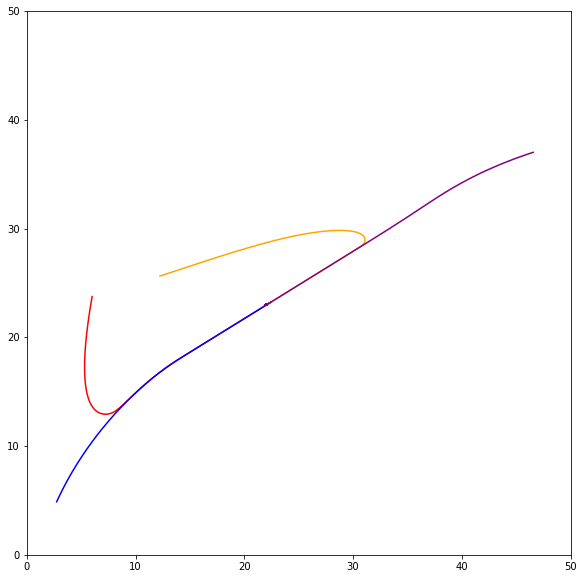

In [20]:
fig = plt.figure(figsize=(10,10))

plt.plot(A_x, A_y, color='red')
plt.plot(B_x, B_y, color='blue')
plt.plot(C_x, C_y, color='orange')
plt.plot(D_x, D_y, color='purple')
plt.gca().set_aspect("equal")
plt.xlim([0, 50])
plt.ylim([0, 50])


plt.show